In [ ]:
pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 939.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using ca

In [ ]:
from medmnist import BloodMNIST
dataset_Teste = BloodMNIST(split="test", download=True, size=28)


100%|██████████| 35461855/35461855 [00:02<00:00, 13131320.74it/s]


In [ ]:
dataset_Train = BloodMNIST(split="train", download=True, size=28)

Using downloaded and verified file: /root/.medmnist/bloodmnist.npz


In [ ]:
dataset_Validation = BloodMNIST(split="val", download=True, size=28)

Using downloaded and verified file: /root/.medmnist/bloodmnist.npz


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from medmnist import BloodMNIST
from medmnist import INFO
from torchvision import transforms



In [ ]:
# Definir transformações
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[.5], std=[.5])])

# Carregar dados BloodMNIST
train_dataset = BloodMNIST(split='train', transform=transform, download=True)
test_dataset = BloodMNIST(split='test', transform=transform, download=True)

# Extrair dados e rótulos
x_train, y_train = train_dataset.imgs, train_dataset.labels
x_test, y_test = test_dataset.imgs, test_dataset.labels

# Normalizar os dados
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convertendo os rótulos para one-hot encoding
y_train = to_categorical(y_train, num_classes=8)
y_test = to_categorical(y_test, num_classes=8)


Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='softmax'))

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/100
374/374 [==============================] - 6s 13ms/step - loss: 1.3433 - accuracy: 0.5291 - val_loss: 1.0068 - val_accuracy: 0.6156
Epoch 2/100
374/374 [==============================] - 3s 8ms/step - loss: 0.9280 - accuracy: 0.6674 - val_loss: 0.8918 - val_accuracy: 0.6808
Epoch 3/100
374/374 [==============================] - 3s 8ms/step - loss: 0.8400 - accuracy: 0.7026 - val_loss: 0.8197 - val_accuracy: 0.6948
Epoch 4/100
374/374 [==============================] - 4s 10ms/step - loss: 0.7748 - accuracy: 0.7241 - val_loss: 0.7400 - val_accuracy: 0.7346
Epoch 5/100
374/374 [==============================] - 5s 14ms/step - loss: 0.7301 - accuracy: 0.7458 - val_loss: 0.7653 - val_accuracy: 0.7109
Epoch 6/100
374/374 [==============================] - 3s 8ms/step - loss: 0.7040 - accuracy: 0.7514 - val_loss: 0.6621 - val_accuracy: 0.7717
Epoch 7/100
374/374 [==============================] - 3s 8ms/step - loss: 0.6638 - accuracy: 0.7653 - val_loss: 0.6563 - val_accuracy: 0.7

107/107 [==============================] - 1s 4ms/step - loss: 0.4552 - accuracy: 0.8369
Accuracy: 0.8368898034095764
107/107 [==============================] - 1s 8ms/step


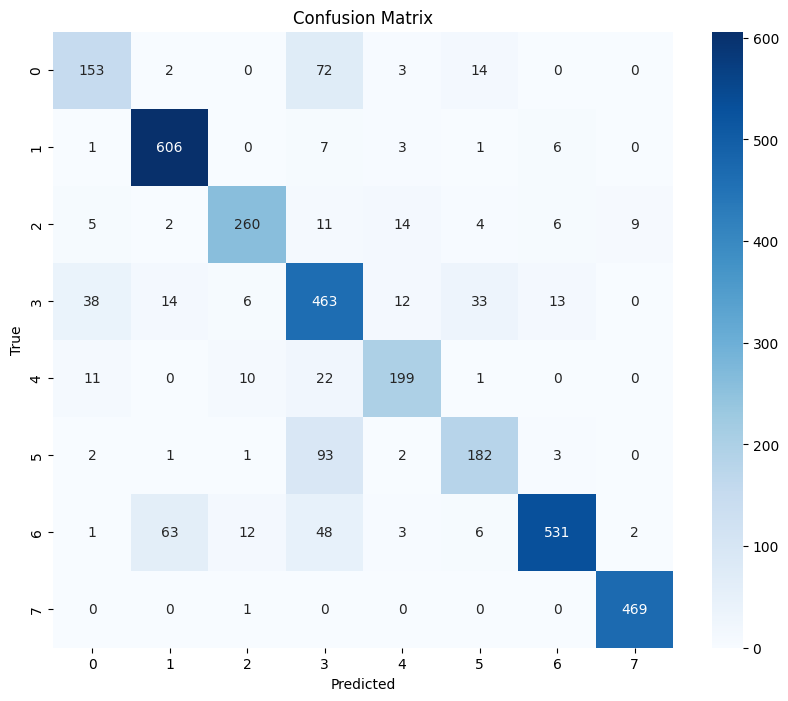

In [ ]:
# Avaliação no conjunto de teste
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy}')

# Prever as classes do conjunto de teste
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Matriz de confusão
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plotando a matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(8), yticklabels=range(8))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist

In [ ]:
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# (x_train, y_train), (x_test, y_test) = (dataset_Train), (dataset_Teste)
x_train, y_train = train_dataset.imgs, train_dataset.labels
x_test, y_test = test_dataset.imgs, test_dataset.labels
# x_train, y_train = dataset_Train.imgs, dataset_Train.labels
# x_teste, y_test = dataset_Teste.imgs, dataset_Teste.labels

x_train = x_train[..., np.newaxis] / 255.0
x_test = x_test[..., np.newaxis] / 255.0
y_train = to_categorical(y_train, 8)
y_test = to_categorical(y_test, 8)

In [ ]:
def create_model(num_kernels, kernel_size):
    model = Sequential([
        Conv2D(num_kernels, kernel_size=kernel_size, activation='relu', input_shape=(28, 28, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(8, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:

# Parâmetros para testar
kernel_numbers = [8, 16, 32]
kernel_sizes = [(3, 3), (5, 5), (7, 7)]

# Função para treinar e avaliar o modelo
def train_and_evaluate(num_kernels, kernel_size):
  model = create_model(num_kernels, kernel_size)
  model.fit(x_train, y_train, epochs=40, batch_size=32, validation_data=(x_test, y_test))
  loss, accuracy = model.evaluate(x_test, y_test)
  return accuracy

# Testar diferentes combinações de parâmetros
results = {}
for num_kernels in kernel_numbers:
    for kernel_size in kernel_sizes:
        accuracy = train_and_evaluate(num_kernels, kernel_size)
        results[(num_kernels, kernel_size)] = accuracy
        print(f'Num Kernels: {num_kernels}, Kernel Size: {kernel_size}, Accuracy: {accuracy}')

# Exibir os resultados
for params, accuracy in results.items():
    print(f'Kernels: {params[0]}, Kernel Size: {params[1]} => Accuracy: {accuracy}')


Epoch 1/40
374/374 [==============================] - 6s 15ms/step - loss: 1.1655 - accuracy: 0.5925 - val_loss: 0.8895 - val_accuracy: 0.7010
Epoch 2/40
374/374 [==============================] - 5s 13ms/step - loss: 0.7842 - accuracy: 0.7413 - val_loss: 0.7558 - val_accuracy: 0.7425
Epoch 3/40
374/374 [==============================] - 6s 17ms/step - loss: 0.6862 - accuracy: 0.7741 - val_loss: 0.6380 - val_accuracy: 0.7773
Epoch 4/40
374/374 [==============================] - 5s 13ms/step - loss: 0.6263 - accuracy: 0.7929 - val_loss: 0.5939 - val_accuracy: 0.8065
Epoch 5/40
374/374 [==============================] - 5s 14ms/step - loss: 0.5727 - accuracy: 0.8143 - val_loss: 0.5733 - val_accuracy: 0.8147
Epoch 6/40
374/374 [==============================] - 6s 16ms/step - loss: 0.5314 - accuracy: 0.8270 - val_loss: 0.5421 - val_accuracy: 0.8182
Epoch 7/40
374/374 [==============================] - 5s 13ms/step - loss: 0.5088 - accuracy: 0.8326 - val_loss: 0.5239 - val_accuracy: 0.8240

In [ ]:
best_params = max(results, key=results.get)
best_model = create_model(best_params[0], best_params[1])
best_model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))

# Avaliar o modelo final
loss, accuracy = best_model.evaluate(x_test, y_test)
print(f'Melhor configuração - Num Kernels: {best_params[0]}, Kernel Size: {best_params[1]}, Accuracy: {accuracy}')


Epoch 1/40
374/374 [==============================] - 9s 23ms/step - loss: 1.0462 - accuracy: 0.6427 - val_loss: 0.7664 - val_accuracy: 0.7287
Epoch 2/40
374/374 [==============================] - 7s 18ms/step - loss: 0.6863 - accuracy: 0.7706 - val_loss: 0.6540 - val_accuracy: 0.7866
Epoch 3/40
374/374 [==============================] - 8s 23ms/step - loss: 0.5844 - accuracy: 0.8009 - val_loss: 0.5385 - val_accuracy: 0.8284
Epoch 4/40
374/374 [==============================] - 7s 18ms/step - loss: 0.5035 - accuracy: 0.8313 - val_loss: 0.4955 - val_accuracy: 0.8451
Epoch 5/40
374/374 [==============================] - 9s 24ms/step - loss: 0.4487 - accuracy: 0.8522 - val_loss: 0.4867 - val_accuracy: 0.8363
Epoch 6/40
374/374 [==============================] - 7s 20ms/step - loss: 0.4176 - accuracy: 0.8569 - val_loss: 0.5014 - val_accuracy: 0.8249
Epoch 7/40
374/374 [==============================] - 7s 20ms/step - loss: 0.3924 - accuracy: 0.8688 - val_loss: 0.4469 - val_accuracy: 0.8351

107/107 [==============================] - 2s 15ms/step


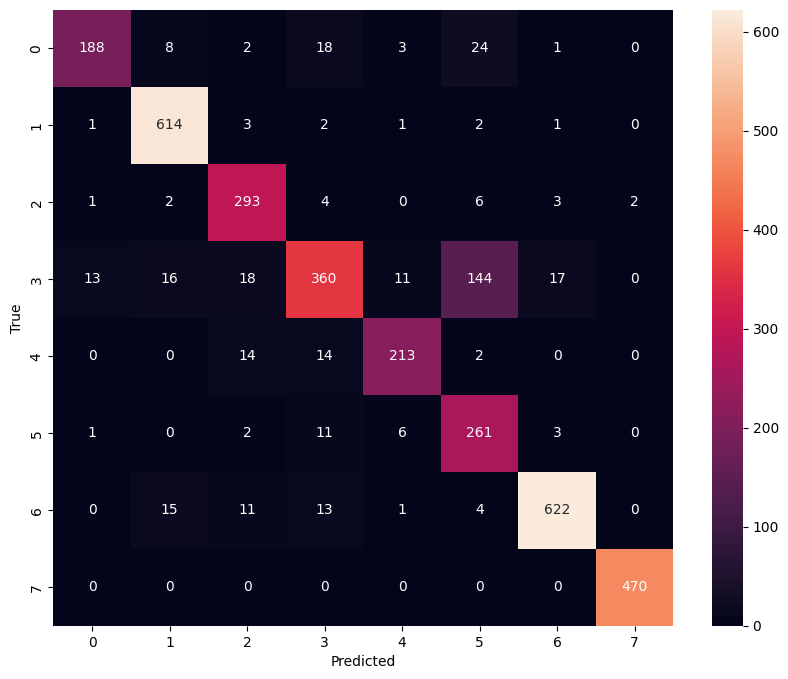

              precision    recall  f1-score   support

           0       0.92      0.77      0.84       244
           1       0.94      0.98      0.96       624
           2       0.85      0.94      0.90       311
           3       0.85      0.62      0.72       579
           4       0.91      0.88      0.89       243
           5       0.59      0.92      0.72       284
           6       0.96      0.93      0.95       666
           7       1.00      1.00      1.00       470

    accuracy                           0.88      3421
   macro avg       0.88      0.88      0.87      3421
weighted avg       0.90      0.88      0.88      3421

Example 1:
True label: 3, Predicted label: 5


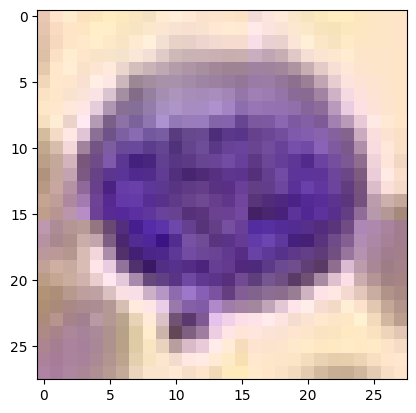

Example 2:
True label: 4, Predicted label: 2


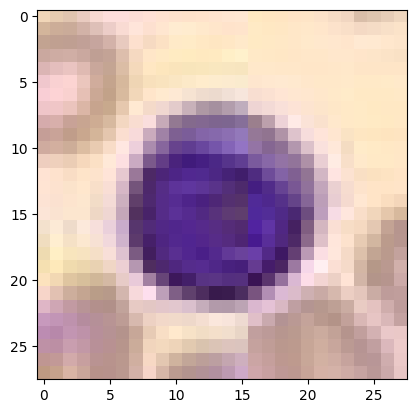

Example 3:
True label: 3, Predicted label: 1


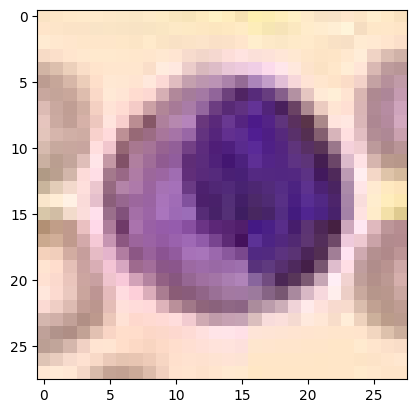

Example 4:
True label: 6, Predicted label: 2


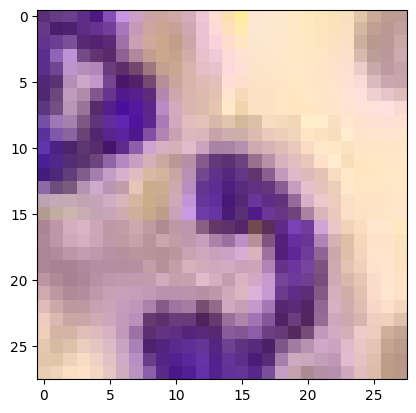

Example 5:
True label: 3, Predicted label: 5


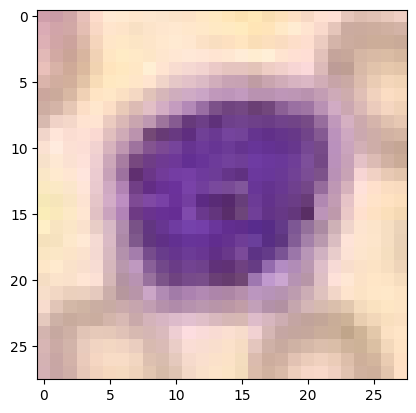

In [ ]:
from sklearn.metrics import classification_report

# Predições
y_pred = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Matriz de confusão
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Relatório de classificação
print(classification_report(y_true, y_pred_classes))


# Identificar exemplos de erros
errors = (y_pred_classes != y_true)
error_indices = np.where(errors)[0]
for i, idx in enumerate(error_indices[:5]):
    print(f"Example {i+1}:")
    print(f"True label: {y_true[idx]}, Predicted label: {y_pred_classes[idx]}")
    plt.imshow(x_test[idx].reshape(28,28,3), cmap='gray')
    plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Add, Activation
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.datasets import mnist

In [ ]:
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# (x_train, y_train), (x_test, y_test) = (dataset_Train), (dataset_Teste)
x_train, y_train = train_dataset.imgs, train_dataset.labels
x_test, y_test = test_dataset.imgs, test_dataset.labels
# x_train, y_train = dataset_Train.imgs, dataset_Train.labels
# x_teste, y_test = dataset_Teste.imgs, dataset_Teste.labels

x_train = x_train[..., np.newaxis] / 255.0
x_test = x_test[..., np.newaxis] / 255.0
y_train = to_categorical(y_train, 8)
y_test = to_categorical(y_test, 8)

In [ ]:
def resnet_block(inputs, filters, kernel_size, strides, use_activation=True):
    x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    if use_activation:
        x = Activation('relu')(x)
    return x

def residual_block(inputs, filters, kernel_size, strides):
    x = resnet_block(inputs, filters, kernel_size, strides)
    x = resnet_block(x, filters, kernel_size, 1, use_activation=False)
    shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='same')(inputs)
    shortcut = BatchNormalization()(shortcut)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def create_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = resnet_block(inputs, 64, (7, 7), 2)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    x = residual_block(x, 64, (3, 3), 1)
    x = residual_block(x, 64, (3, 3), 1)

    x = residual_block(x, 128, (3, 3), 2)
    x = residual_block(x, 128, (3, 3), 1)

    x = residual_block(x, 256, (3, 3), 2)
    x = residual_block(x, 256, (3, 3), 1)

    x = residual_block(x, 512, (3, 3), 2)
    x = residual_block(x, 512, (3, 3), 1)

    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Criar a ResNet
input_shape = (28, 28, 3)
num_classes = 8
resnet_model = create_resnet(input_shape, num_classes)


In [ ]:
# Treinar o modelo ResNet
resnet_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Avaliar o modelo ResNet
loss, accuracy = resnet_model.evaluate(x_test, y_test)
print(f'Acurácia global da ResNet: {accuracy}')


Epoch 1/20
374/374 [==============================] - 423s 1s/step - loss: 0.6933 - accuracy: 0.7675 - val_loss: 2.5443 - val_accuracy: 0.3563
Epoch 2/20
374/374 [==============================] - 411s 1s/step - loss: 0.4608 - accuracy: 0.8362 - val_loss: 0.9779 - val_accuracy: 0.7004
Epoch 3/20
374/374 [==============================] - 415s 1s/step - loss: 0.3871 - accuracy: 0.8629 - val_loss: 1.5164 - val_accuracy: 0.5913
Epoch 4/20
374/374 [==============================] - 406s 1s/step - loss: 0.3535 - accuracy: 0.8726 - val_loss: 0.9292 - val_accuracy: 0.6925
Epoch 5/20
374/374 [==============================] - 405s 1s/step - loss: 0.3101 - accuracy: 0.8864 - val_loss: 1.2664 - val_accuracy: 0.6548
Epoch 6/20
374/374 [==============================] - 412s 1s/step - loss: 0.3027 - accuracy: 0.8936 - val_loss: 0.5557 - val_accuracy: 0.8229
Epoch 7/20
374/374 [==============================] - 404s 1s/step - loss: 0.2710 - accuracy: 0.9032 - val_loss: 1.0206 - val_accuracy: 0.6486